In [84]:
from src.models.convex import ConvexStockNet

In [85]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [86]:
tick = 'AAPL'
batch_size = 1
n_regions = 5_000
n_epochs = 100
percent_split = 0.75

#data_dict = pickle.load(open('data/reduced_jack_stocks_data.pkl', 'rb'))
data_dict = np.load('data/data_df_c_AV_nanfix.npy', allow_pickle=True).item()

data = data_dict[tick]

train_size = int(percent_split * data.shape[0])
test_size = data.shape[0] - train_size
print(data.shape)

(3518, 83)


In [87]:
n_examples, n_features = data.shape
data, labels = data[:, :-1], data[:, [-1]]
data = np.append(data, np.ones([n_examples, 1]), axis=1)
data = np.append(data, labels, axis=1)

train_set = data[:train_size]
test_set = data[train_size:]

def MSE_(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

train_labels = train_set[:, -1]
test_labels= test_set[:, -1]
trivial=np.full(test_labels.shape, np.mean(train_labels))
trivial_MSE=MSE_(trivial, test_labels)
trivial_MSE = np.square(trivial - test_labels).mean()
print(trivial_MSE)

print(np.linalg.norm(test_labels))

train_set = DataLoader(train_set, shuffle=True, batch_size=batch_size)
test_set = DataLoader(test_set, shuffle=True, batch_size=batch_size)

0.046257451286348096
6.375482244839475


In [92]:
model = ConvexStockNet(n_features, n_regions).to(device)

In [93]:
results = model.train(train_set, test_set, n_epochs, lr=1e-6, beta=1e1)

Obj Loss = 0.523: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:05<00:00,  4.85s/it]


In [94]:
tloss, vloss, pred = results

In [95]:
import seaborn as sns

sns.set_context('notebook')
sns.set_style('ticks')

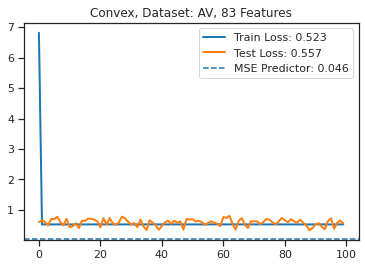

In [96]:
plt.figure()
plt.plot(tloss, lw=2, label=f'Train Loss: {tloss[-1]:.3f}')
plt.plot(vloss, lw=2, label=f'Test Loss: {vloss[-1]:.3f}')
plt.axhline(trivial_MSE, linestyle='--', label=f'MSE Predictor: {trivial_MSE:.3f}')
plt.title(f'Convex, Dataset: AV, {n_features} Features')
plt.legend()
plt.savefig('example.png', dpi=300)
plt.show()

In [97]:
u = model.U.detach().cpu().numpy()

In [98]:
nu = np.linalg.norm(u, axis=0)

(5000,)


AttributeError: module 'numpy' has no attribute 'nnz'

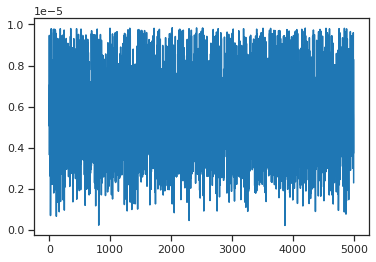

In [100]:
print(nu.shape)
plt.plot(nu)
print(np.count_nonzeros(nu))